# Testing the model

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
data = pd.read_csv("Bank-data.csv")
data = data.drop(["Unnamed: 0"], axis = 1)
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [3]:
data.describe(include="all")

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


In [4]:
data["y"] = data["y"].map({"yes":1, "no":0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


### Declare the dependent and independent variables

In [5]:
y = data["y"]
x1 = data["duration"]

### Simple Logistic Regression

In [7]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Aug 2020   Pseudo R-squ.:                  0.2121
Time:                        17:29:56   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

Text(0, 0.5, 'subscription')

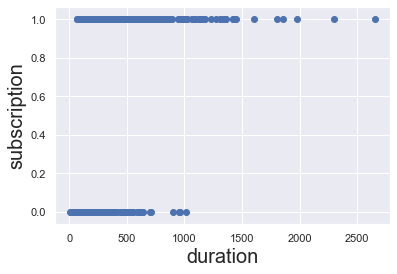

In [10]:
plt.scatter(x1,y, color = 'C0')
plt.xlabel("duration", fontsize =20)
plt.ylabel("subscription", fontsize=20)

## Multivariate logistic regression

### Declare the independent variable(s)

In [30]:
estimators = ["interest_rate", "march", "credit", "previous", "duration"]
x1_new = data[estimators]

In [31]:
x_new = sm.add_constant(x1_new)
reg_log = sm.Logit(y,x_new)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Aug 2020   Pseudo R-squ.:                  0.5143
Time:                        17:39:34   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

In [32]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [33]:
confusion_matrix(x_new, y, results_log)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model

### Load new data 

In [34]:
test_data = pd.read_csv("Bank-data-testing.csv")
test_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no
...,...,...,...,...,...,...,...,...
217,217,4.963,0.0,0.0,0.0,0.0,458.0,yes
218,218,1.264,0.0,1.0,1.0,0.0,397.0,yes
219,219,1.281,0.0,1.0,0.0,0.0,34.0,no
220,220,0.739,0.0,0.0,2.0,0.0,233.0,no


In [35]:
test_data["y"] = test_data["y"].map({"yes":1, "no":0})
test_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...,...
217,217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,220,0.739,0.0,0.0,2.0,0.0,233.0,0


### Declare the dependent and the independent variables

In [36]:
y_new = test_data["y"]
x1_new2 = test_data[estimators]
x1_new2

,interest_rate,march,credit,previous,duration
0,1.313,1.0,0.0,0.0,487.0
1,4.961,0.0,0.0,0.0,132.0
2,4.856,1.0,0.0,0.0,92.0
3,4.120,0.0,0.0,0.0,1468.0
4,4.963,0.0,0.0,0.0,36.0
...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,458.0
218,1.264,1.0,0.0,0.0,397.0
219,1.281,1.0,0.0,0.0,34.0
220,0.739,0.0,0.0,0.0,233.0


In [37]:
x_new2 = sm.add_constant(x1_new2)
x_new2

,const,interest_rate,march,credit,previous,duration
0,1.0,1.313,1.0,0.0,0.0,487.0
1,1.0,4.961,0.0,0.0,0.0,132.0
2,1.0,4.856,1.0,0.0,0.0,92.0
3,1.0,4.120,0.0,0.0,0.0,1468.0
4,1.0,4.963,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...
217,1.0,4.963,0.0,0.0,0.0,458.0
218,1.0,1.264,1.0,0.0,0.0,397.0
219,1.0,1.281,1.0,0.0,0.0,34.0
220,1.0,0.739,0.0,0.0,0.0,233.0


In [38]:
confusion_matrix(x_new2, y_new, results_log)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

In [39]:
cm1 = confusion_matrix(x_new, y, results_log)
cm2 = confusion_matrix(x_new2, y_new, results_log)
print(cm1[0])
print(cm2[0])
print(cm1[1])
print(cm2[1])

[[218.  41.]
 [ 30. 229.]]
[[93. 18.]
 [13. 98.]]
0.862934362934363
0.8603603603603603
